In [2]:
%matplotlib inline
%automagic ON
%xmode Verbose


Automagic is ON, % prefix IS NOT needed for line magics.
Exception reporting mode: Verbose


# Example of reading and basic operations of PV_DrahiX_Meteo_SIRTA_conso_20200801_20231231

Les données portent sur 12 ans de mesures (du 01/01/2006 au 31/12/2017)

In [3]:
import pandas as pd
import numpy as np
import pvlib as pv
from matplotlib.dates import DateFormatter
import matplotlib
import matplotlib.pyplot as plt
import dateutil

# Style of figures
plt.style.use('seaborn-poster')
# Size of figures
plt.rcParams['figure.figsize'] = 15, 7

## Read the file with pandas

In [5]:
date_parser = lambda x: dateutil.parser.parse(x, ignoretz=True)

data = pd.read_csv(
    'PV_DrahiX_Meteo_SIRTA_conso_20200801_20231231.csv', # nom du fichier
    sep=',',  # le caractère utilisé comme séparateur de colonne
    header=0,  # la ligne contenant le titre des colonnes
    infer_datetime_format=True,  # on le laisse tenter de décoder les dates seules
    parse_dates=['datetime'],  # on indique les colonnes contenant des dates
    index_col=['datetime'],  # la colonne jouant le role "d'index", la colonne principale
    date_parser=date_parser)

In [6]:
data.columns

Index(['AirTemp', 'pres', 'rain', 'rh', 'wd', 'ws', 'Global_Solar_Flux',
       'Diffuse_Solar_Flux', 'Direct_Solar_Flux', 'Downwelling_IR_Flux', 'SAA',
       'SZA', 'doy', 'PAC', 'TGBT [kW]', 'kw_heater_corridor1_zone1',
       'kw_heaters_corridor_zone2', 'kw_heaters_toilets_zone2',
       'kw_heatingcoolingtotal_zone1', 'kw_heatingcoolingtotal_zone2',
       'kw_lights_zone1', 'kw_lights_zone2', 'kw_total_zone1',
       'kw_total_zone2', 'kw_ventilation_zone1', 'kw_ventilation_zone2',
       'kw_water_heater_zone2', 'plugs_zone2'],
      dtype='object')

<AxesSubplot:xlabel='datetime'>

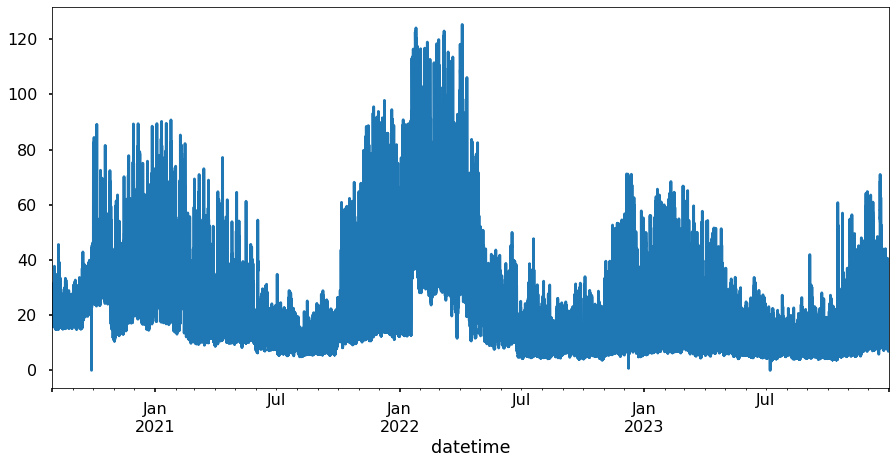

In [8]:
data['TGBT [kW]'].plot()

### Compute percentage of nan values per column

In [9]:
data.isna().sum() / data.index.size * 100

AirTemp                          0.068443
pres                             0.019197
rain                             0.019197
rh                               0.019197
wd                               0.019197
ws                               0.082632
Global_Solar_Flux                0.014189
Diffuse_Solar_Flux               0.014189
Direct_Solar_Flux                0.014189
Downwelling_IR_Flux              0.014189
SAA                              0.014189
SZA                              0.014189
doy                              0.014189
PAC                             38.690238
TGBT [kW]                        0.030048
kw_heater_corridor1_zone1        0.030048
kw_heaters_corridor_zone2        0.030048
kw_heaters_toilets_zone2         0.030048
kw_heatingcoolingtotal_zone1     0.030048
kw_heatingcoolingtotal_zone2     0.030048
kw_lights_zone1                  0.030048
kw_lights_zone2                  0.030048
kw_total_zone1                   0.030048
kw_total_zone2                   0

In [10]:
data.columns

Index(['AirTemp', 'pres', 'rain', 'rh', 'wd', 'ws', 'Global_Solar_Flux',
       'Diffuse_Solar_Flux', 'Direct_Solar_Flux', 'Downwelling_IR_Flux', 'SAA',
       'SZA', 'doy', 'PAC', 'TGBT [kW]', 'kw_heater_corridor1_zone1',
       'kw_heaters_corridor_zone2', 'kw_heaters_toilets_zone2',
       'kw_heatingcoolingtotal_zone1', 'kw_heatingcoolingtotal_zone2',
       'kw_lights_zone1', 'kw_lights_zone2', 'kw_total_zone1',
       'kw_total_zone2', 'kw_ventilation_zone1', 'kw_ventilation_zone2',
       'kw_water_heater_zone2', 'plugs_zone2'],
      dtype='object')

### Resample to daily mean values

In [11]:
data_day = data.resample('D').mean()
data_day.head(4)

,AirTemp,pres,rain,rh,wd,ws,Global_Solar_Flux,Diffuse_Solar_Flux,Direct_Solar_Flux,Downwelling_IR_Flux,...,kw_heatingcoolingtotal_zone1,kw_heatingcoolingtotal_zone2,kw_lights_zone1,kw_lights_zone2,kw_total_zone1,kw_total_zone2,kw_ventilation_zone1,kw_ventilation_zone2,kw_water_heater_zone2,plugs_zone2
datetime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,22.261573,996.236635,0.0,64.903948,309.488615,2.990010,207.947021,147.135615,92.782167,378.030146,...,-0.187646,-0.378802,-0.075313,-0.023542,0.495562,1.843885,-0.017000,-0.065854,-0.041146,-1.572396
2020-08-02,18.845115,997.205885,0.0,56.753427,325.316667,3.375490,302.218573,98.753792,324.097875,332.724031,...,-0.189115,-0.330937,-0.070000,-0.021917,0.491083,1.792813,-0.017000,-0.065646,-0.040031,-1.569031
2020-08-03,17.474948,995.104510,0.0,58.465313,283.480750,3.380656,227.090104,110.229125,164.909417,337.274531,...,-0.188510,-0.365625,-0.079865,-0.064760,0.505125,1.880083,-0.016979,-0.053885,-0.059219,-1.572021
2020-08-04,18.955437,997.109802,0.0,50.991635,257.746156,1.767042,281.605448,65.530365,379.483115,319.055427,...,-0.189490,-0.370448,-0.081052,-0.077125,0.504094,1.877125,-0.016948,-0.053583,-0.039823,-1.572271


## Simple plots

Text(0, 0.5, 'TGBT [kW]')

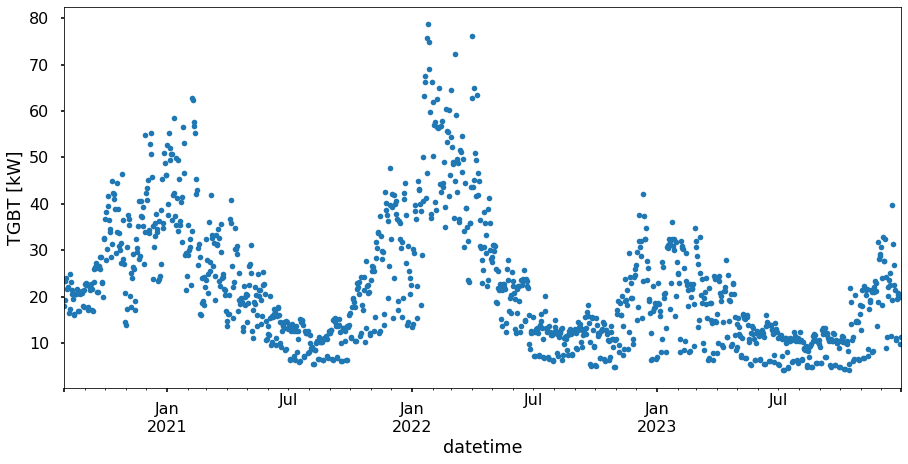

In [12]:
data_day['TGBT [kW]'].plot(marker='.',linestyle='none')
plt.ylabel('TGBT [kW]')

/var/folders/z0/yhq6tfy10bb86tgykzq7qbp00000gn/T/ipykernel_16114/3729368468.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax.plot(data[seldate][['PAC']])
/var/folders/z0/yhq6tfy10bb86tgykzq7qbp00000gn/T/ipykernel_16114/3729368468.py:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax2.plot(data[seldate]['kw_total_zone1'],color='orange')


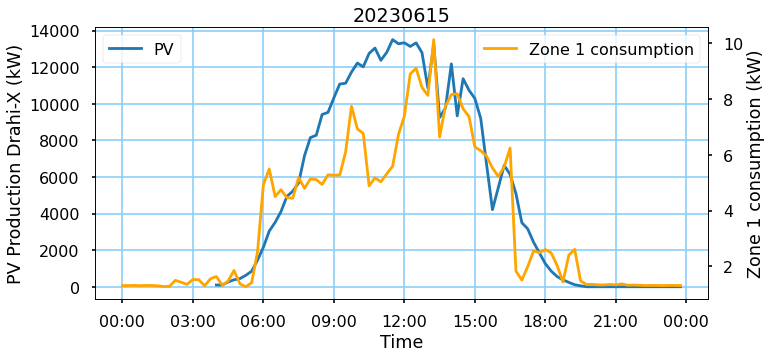

In [14]:
seldate='20230615'

fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(data[seldate][['PAC']])
ax.set_ylabel('PV Production Drahi-X (kW)')
ax.set_xlabel('Time')
ax.legend(['PV'],loc=2)
ax.grid('on',color='lightskyblue')

plt.title(seldate)
# Define the date format
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

ax2=ax.twinx()
ax2.plot(data[seldate]['kw_total_zone1'],color='orange')
ax2.legend(['Zone 1 consumption'],loc=1)
ax2.set_ylabel('Zone 1 consumption (kW)')
ax2.xaxis.set_major_formatter(date_form)

plt.savefig('test.png')